In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

Ok, let's start to check if stabilization works.

In [36]:
from ct_charachterization import run_first_algorithms, run_third_algorithm
import numpy as np
from matplotlib import pyplot as plt

iteration: 1, error: 6.142541280031191
iteration: 2, error: 0.0


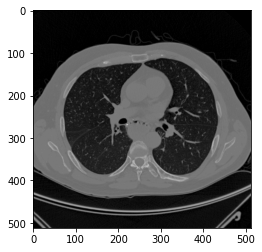

Unstable image due to variance is:


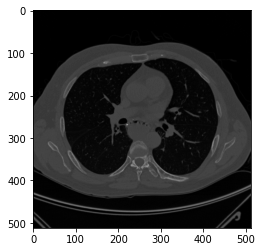

In [39]:
mu_5 = np.array([-1000, -700, -90, 50, 300])
img = np.load(f'''../resources/2d_img.npy''')
s_5, _, _ = run_third_algorithm(img, mu_5, non_central=True, constant_c=10)
plt.imshow(s_5, cmap='gray')
plt.show()
print("Unstable image due to variance is:")
plt.imshow(img, cmap='gray')
plt.show()

Cool! It seems we have done a pretty good work! Let's try with different mu:

iteration: 1, error: 6.1695084702770435
iteration: 2, error: 0.0


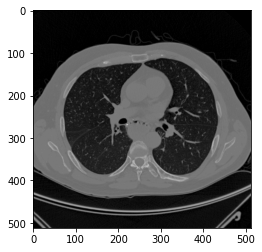

In [40]:
mu_9 = np.array([340, 240, 100, 0, -160, -370, -540, -810, -987])
s_9, _, _ = run_third_algorithm(img, mu_9, non_central=True, constant_c=10)

plt.imshow(s_9, cmap='gray')
plt.show()


Hmmm... But it seems there is no big difference between them. Let's compare their voxel values:

In [41]:
print(np.min(s_5), np.mean(s_5), np.max(s_5))
print(np.min(s_9), np.mean(s_9), np.max(s_9))

403.7992127241157 414.92642348410817 454.23626840276313
406.6282869659524 417.77653261338537 457.16068889191314


Hmmm... no big difference! 

Let's try just seeing what happens if we square root each voxel values!

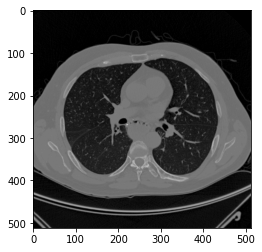

5.477226 18.274057 63.48228


In [44]:
img_centered = img + 1030
img_sqrt = np.sqrt(img_centered)
plt.imshow(img_sqrt, cmap='gray')
plt.show()
print(np.min(img_sqrt), np.mean(img_sqrt), np.max(img_sqrt))

The image is pretty much the same as "stabilized" versions above! But min, mean, and max values are different.

It seems that square root of the image has the biggest effect on stabilizing it.